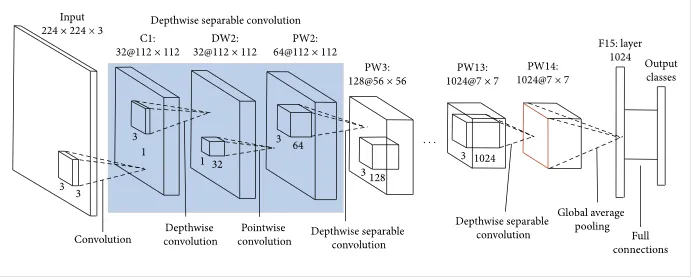

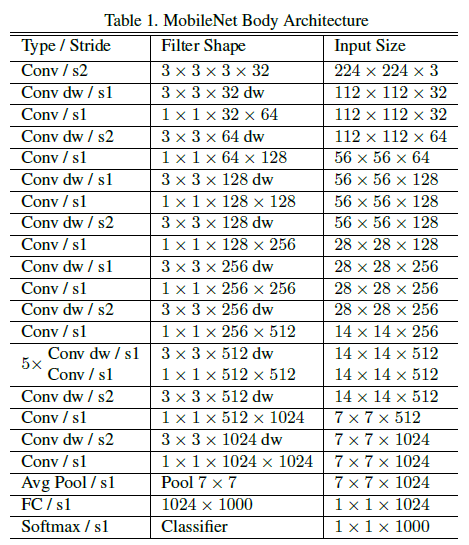

### `Number of parameters = (filter height) x (filter width) x (input channels) x (output channels)`
### = 3 x 3 x 3 x 32
### = 864


## Depthwise convolution:
### `Number of parameters = (filter height) x (filter width) x (input channels) `
                     = 3 x 3 x 32
                     = 288

##Pointwise convolution:
### `Number of parameters = (input channels) x  (output channels)`
                     = 32 x 64
                     = 2048




## **`Require Modules`**

In [15]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense, Flatten, ReLU, Conv2D, DepthwiseConv2D, GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model


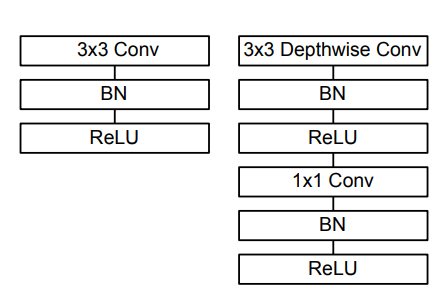

### `MobileNet starts with a basic 2D convolution layer`

In [16]:
input_img = Input(shape=(224, 224, 3))

In [17]:
x = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same')(input_img)
x = BatchNormalization()(x)
x = ReLU()(x)

In [18]:
def convolution_block(input_layer, strides, filters):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters=filters, kernel_size=1, strides=1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    return x

In [19]:
classes = 10
x = convolution_block(x, filters = 64, strides = 1)
x = convolution_block(x, filters = 128, strides = 2)
x = convolution_block(x, filters = 128, strides = 1)
x = convolution_block(x, filters = 256, strides = 2)
x = convolution_block(x, filters = 256, strides = 1)
x = convolution_block(x, filters = 512, strides = 2)

for i in range (5):
  x = convolution_block(x, filters = 512, strides = 1)

x = convolution_block(x, filters = 1024, strides = 2)
x = convolution_block(x, filters = 1024, strides = 1)
x = GlobalAveragePooling2D()(x)

out = Dense (units = classes, activation = 'softmax')(x)


In [20]:
model = Model(inputs=input_img, outputs=out)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_54 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_54 (ReLU)             (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_28 (Depthw  (None, 112, 112, 32)     320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_55 (Bat  (None, 112, 112, 32)     128 

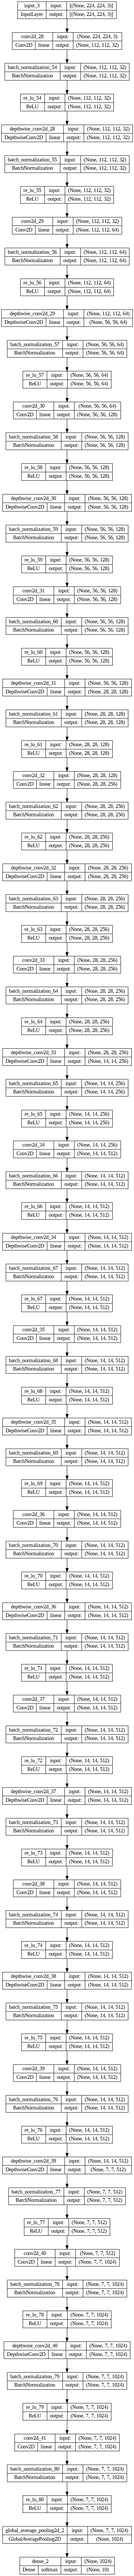

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, show_layer_activations = True)

* In MobileNet, the hyperparameter alpha controls the width of the network

* For example, if we set `alpha=0.5`, each layer in the network will have roughly half the number of filters as the original MobileNet architecture. This will result in a smaller model that is faster to train and execute, but may have lower accuracy. On the other hand, if we set `alpha=1.0`, the model will have the same number of filters as the original MobileNet architecture, resulting in a larger and more accurate model.